In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
import scipy
from scipy import stats

In [2]:
#import data

path = r'/Users/juliewhitton/Desktop/Personal Project/'
df = pd.read_csv(os.path.join(path, 'Data', 'Final Data', 'incidents_final.csv'), 
                 usecols = ['total_laws','v_inc_rate'])
df.head()
                         

,v_inc_rate,total_laws
0,14.03,5.0
1,16.70,12.0
2,9.08,15.0
3,19.73,2.0
4,18.47,3.0


In [3]:
#standardize data

df = stats.zscore(df)
df.head()

,v_inc_rate,total_laws
0,-0.389320,-0.280668
1,-0.185988,1.574860
2,-0.766284,2.370087
3,0.044759,-1.075895
4,-0.051195,-0.810819


In [4]:
df.isna().sum()

v_inc_rate    0
total_laws    0
dtype: int64

In [5]:
#determine no of clusters

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [6]:
#create cluster scores

score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 
score

[-407.99999999999983,
 -251.67467760941474,
 -149.0227363501929,
 -108.91885092159359,
 -72.31557750399205,
 -60.530094557922936,
 -49.03557877875322,
 -39.4197717444937,
 -32.92752394627835]

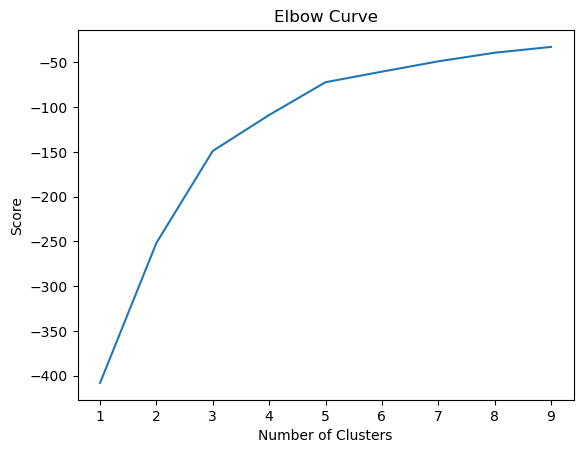

In [7]:
#create plot

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [8]:
#assign no of clusters and apply algo

kmeans = KMeans(n_clusters = 5)
kmeans.fit(df)

KMeans(n_clusters=5)

In [9]:
#create cluster col 

df['clusters'] = kmeans.fit_predict(df)
df.head()

,v_inc_rate,total_laws,clusters
0,-0.389320,-0.280668,1
1,-0.185988,1.574860,0
2,-0.766284,2.370087,0
3,0.044759,-1.075895,3
4,-0.051195,-0.810819,3


In [10]:
#check value counts

df['clusters'].value_counts()

3    77
1    71
0    30
4    22
2     4
Name: clusters, dtype: int64

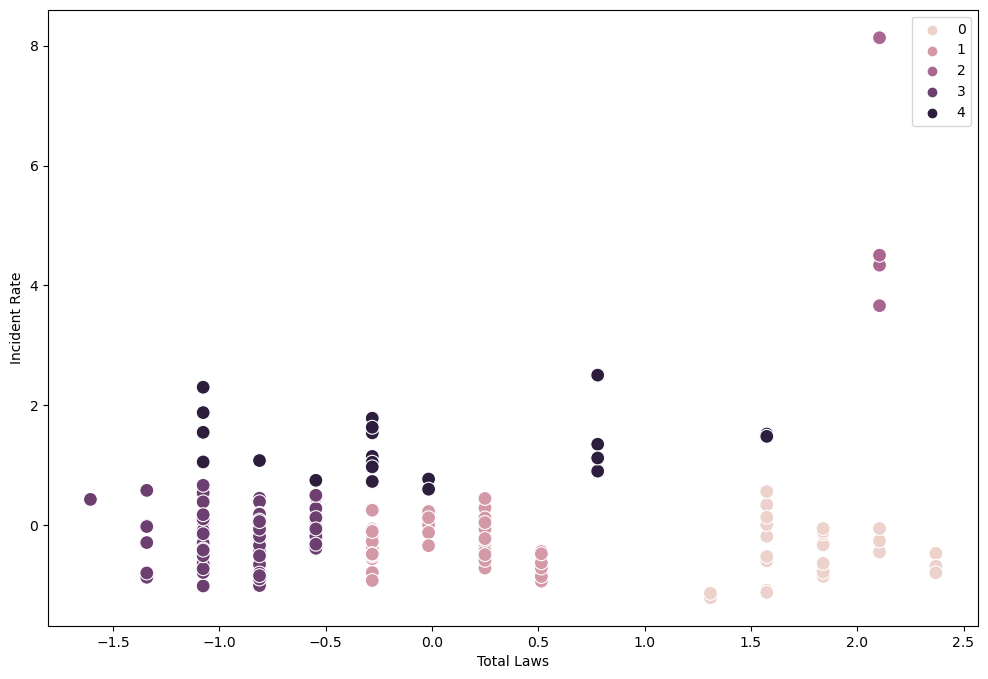

In [11]:
#create plot w/v_inc_rate and total_laws

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df['total_laws'], y = df['v_inc_rate'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Total Laws') # Label x-axis.
plt.ylabel('Incident Rate') # Label y-axis.
plt.show()

In [12]:
df.loc[df['clusters'] == 4, 'cluster'] = 'dark blue'
df.loc[df['clusters'] == 3, 'cluster'] = 'purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'light purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [13]:
df_stats = df.groupby('cluster').agg({'total_laws':['mean', 'median'], 'v_inc_rate':['mean', 'median']})
df_stats

total_laws           v_inc_rate          
                   mean    median       mean    median
cluster                                               
dark blue     -0.075837 -0.280668   1.306913  1.134147
light pink     1.804592  1.839936  -0.416152 -0.459763
light purple   2.105011  2.105011   5.158522  4.420586
pink           0.103878  0.249483  -0.305872 -0.288797
purple        -0.886555 -0.810819  -0.197204 -0.142580